In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Upload dataset from your local machine
uploaded = files.upload()

In [4]:
# Extract the filename from the uploaded file
for filename in uploaded.keys():
    # Load the dataset
    data = pd.read_csv(filename)

    # Print out the column names to inspect them
    print("Columns in the dataset:")
    print(data.columns)

    # Inspect the first few rows to understand the data structure
    print("\nFirst few rows of the dataset:")
    print(data.head())

    # Check for missing data
    print("\nMissing data per column:")
    print(data.isnull().sum())

Columns in the dataset:
Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

First few rows of the dataset:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840              

In [11]:
# List of independent variables (make sure these columns exist in the dataset)
independent_variables = [
    "X1 transaction date",
    "X2 house age",
    "X3 distance to the nearest MRT station",
    "X4 number of convenience stores",
    "X5 latitude",
    "X6 longitude",
]

target_column = 'Y house price of unit area'

# Target variable
y = data[target_column].values

# Degree of polynomial
degree = 3

# Initialize lists to store aggregated metrics
all_y = []
all_y_pred = []

# Initialize a dictionary to store results for each variable
results = []

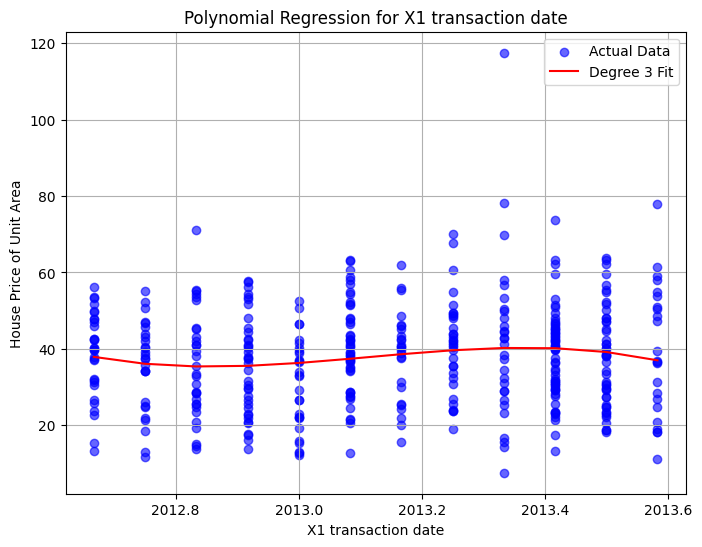

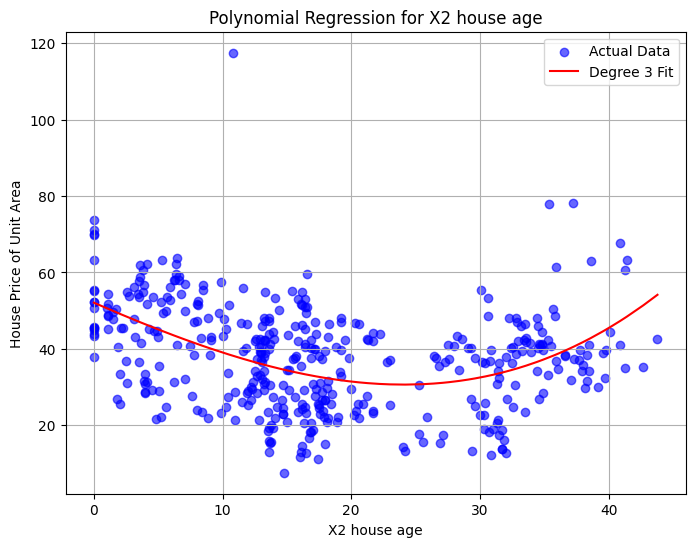

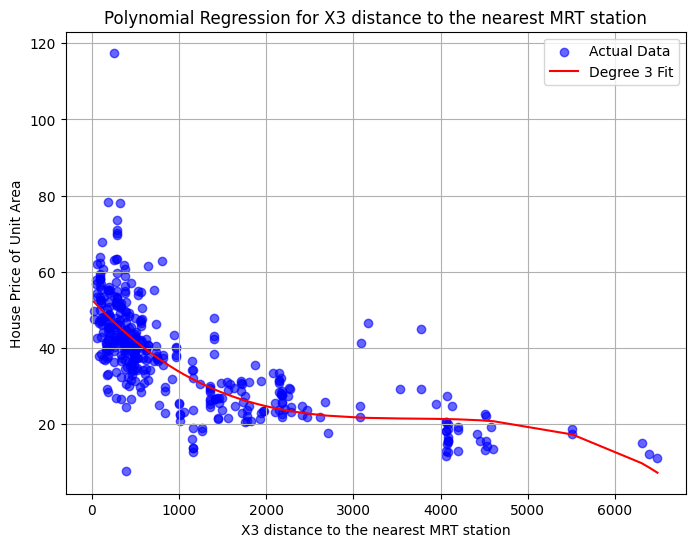

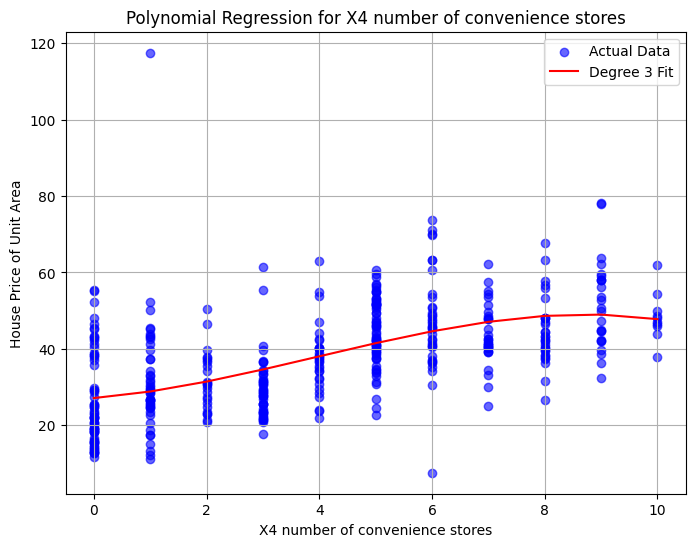

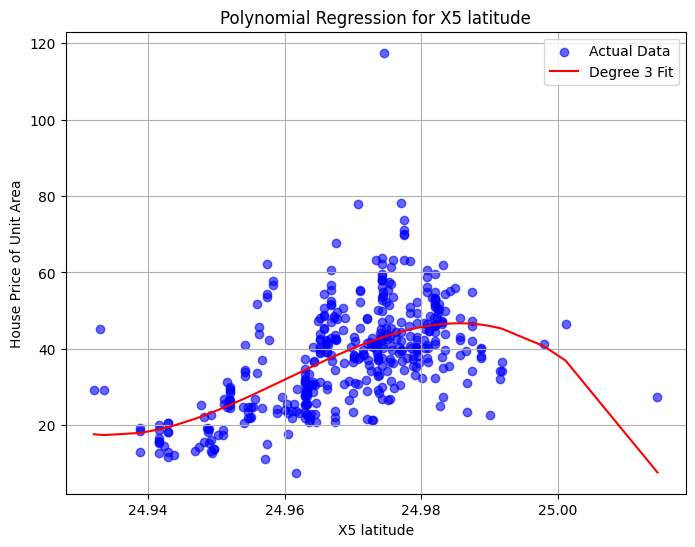

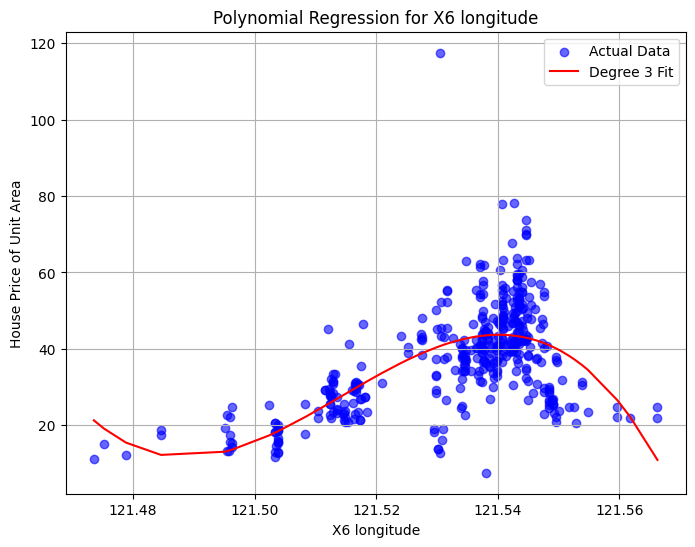

In [12]:
for var in independent_variables:
    # Prepare independent variable
    if var in data.columns:
        X = data[var].values
    else:
        print(f"Column {var} not found in dataset.")
        continue

    # Fit polynomial regression
    coeffs = np.polyfit(X, y, degree)
    poly_model = np.poly1d(coeffs)

    # Predict values
    y_pred = poly_model(X)

    # Calculate metrics for this variable
    mae = np.mean(np.abs(y - y_pred))
    rss = np.sum((y - y_pred) ** 2)
    mse = np.mean((y - y_pred) ** 2)
    r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Save the metrics in the results list
    results.append({
        "Variable": var,
        "MAE": mae,
        "RSS": rss,
        "MSE": mse,
        "R2": r2
    })

    # Store actual and predicted values for aggregated metrics
    all_y.extend(y)
    all_y_pred.extend(y_pred)

    # Plot the model
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color="blue", label="Actual Data", alpha=0.6)
    plt.plot(sorted(X), poly_model(sorted(X)), color="red", label=f"Degree {degree} Fit")
    plt.title(f"Polynomial Regression for {var}")
    plt.xlabel(var)
    plt.ylabel("House Price of Unit Area")
    plt.legend()
    plt.grid(True)
    plt.show()

In [13]:
# Print metrics for each independent variable
print("Metrics for Each Independent Variable:")
for result in results:
    print(f"Variable: {result['Variable']}")
    print(f"  Mean Absolute Error (MAE): {result['MAE']:.2f}")
    print(f"  Residual Sum of Squares (RSS): {result['RSS']:.2f}")
    print(f"  Mean Squared Error (MSE): {result['MSE']:.2f}")
    print(f"  R2 Score: {result['R2']:.2f}")
    print()

Metrics for Each Independent Variable:
Variable: X1 transaction date
  Mean Absolute Error (MAE): 10.62
  Residual Sum of Squares (RSS): 75230.18
  Mean Squared Error (MSE): 181.72
  R2 Score: 0.02

Variable: X2 house age
  Mean Absolute Error (MAE): 9.81
  Residual Sum of Squares (RSS): 60826.88
  Mean Squared Error (MSE): 146.92
  R2 Score: 0.20

Variable: X3 distance to the nearest MRT station
  Mean Absolute Error (MAE): 6.30
  Residual Sum of Squares (RSS): 33931.49
  Mean Squared Error (MSE): 81.96
  R2 Score: 0.56

Variable: X4 number of convenience stores
  Mean Absolute Error (MAE): 8.26
  Residual Sum of Squares (RSS): 50775.32
  Mean Squared Error (MSE): 122.65
  R2 Score: 0.34

Variable: X5 latitude
  Mean Absolute Error (MAE): 8.04
  Residual Sum of Squares (RSS): 48457.57
  Mean Squared Error (MSE): 117.05
  R2 Score: 0.37

Variable: X6 longitude
  Mean Absolute Error (MAE): 7.50
  Residual Sum of Squares (RSS): 45019.31
  Mean Squared Error (MSE): 108.74
  R2 Score: 0.41

In [14]:
# Convert to numpy arrays for metric calculations
all_y = np.array(all_y)
all_y_pred = np.array(all_y_pred)

# Calculate final metrics
mae = np.mean(np.abs(all_y - all_y_pred))
rss = np.sum((all_y - all_y_pred) ** 2)
mse = np.mean((all_y - all_y_pred) ** 2)
r2 = 1 - (np.sum((all_y - all_y_pred) ** 2) / np.sum((all_y - np.mean(all_y)) ** 2))

# Print aggregated metrics
print("Overall Model Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Residual Sum of Squares (RSS): {rss:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Overall Model Metrics:
Mean Absolute Error (MAE): 8.42
Residual Sum of Squares (RSS): 314240.76
Mean Squared Error (MSE): 126.51
R2 Score: 0.32
